In [1]:
import starepandas
import geopandas
import pystare
import matplotlib.pyplot as plt
import importlib

In [8]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
modis = starepandas.read_granule(fname, read_latlon=True, sidecar=True)

In [9]:
modis

,lat,lon,stare,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared
0,53.201778,-15.933996,4298473764500464809,8.493984e+08,14709,-2296,6534,-8952,-9999
1,53.203171,-16.288101,4298458168380511209,8.493984e+08,14700,-2354,6472,-8980,-9999
2,53.203518,-16.629105,4297394569014717897,8.493984e+08,14692,-2410,6411,-9008,-9999
3,53.202934,-16.957928,4297300698872999369,8.493984e+08,14684,-2464,6351,-9034,-9999
4,53.201508,-17.275316,4297290857922121161,8.493984e+08,14676,-2516,6291,-9059,-9999
...,...,...,...,...,...,...,...,...,...
109615,64.084297,-66.281410,3727686638370615689,8.493987e+08,12157,-7468,6223,4800,-9999
109616,63.960953,-66.591354,3727661374545790857,8.493987e+08,12147,-7505,6282,4772,-9999
109617,63.831799,-66.911255,3727838256925064969,8.493987e+08,12137,-7544,6342,4743,-9999
109618,63.698635,-67.236229,3727843063731949801,8.493987e+08,12126,-7583,6402,4714,-9999


In [4]:
trixels = modis.trixels()
modis.set_trixels(trixels, inplace=True)

In [5]:
geom = geopandas.points_from_xy(modis.lon, modis.lat)
modis.set_geometry(geom, inplace=True)

<AxesSubplot:>

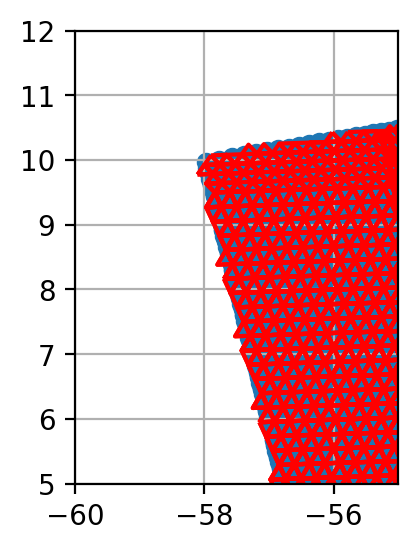

In [6]:
fig, ax = plt.subplots(figsize=(3,3), dpi=200)
ax.grid(True)

ax.set_xlim(-60,-55)
ax.set_ylim(5,12)
modis.plot(trixels=False, ax=ax)
modis.plot(trixels=True, color='r', ax=ax)

# Plotting footprints

In [9]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
mod05 = starepandas.io.granules.Mod05(fname)

In [15]:
mod05.

'../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'

In [14]:
mod05.read_sidecar_cover()
mod05.stare_cover

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-2,
            dtype=int64)

# Manually getting the 2D STARE array

In [8]:
import netCDF4
from pyhdf.SD import SD
import numpy
import pystare
import datetime

In [9]:
hdf = SD(fname)
lon = hdf.select('Longitude').get().astype(numpy.double)
lat = hdf.select('Latitude').get().astype(numpy.double)

In [10]:
start = datetime.datetime.now()
sids = pystare.from_latlon2D(lat=lat, lon=lon, adapt_resolution=True)
datetime.datetime.now()-start

datetime.timedelta(0, 1, 9116)

In [11]:
print(pystare.spatial_resolution(sids).min())
print(pystare.spatial_resolution(sids).max())

9
11


# Intersecting Data 

In [12]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.sort_values(by='name', inplace=True)
stare = starepandas.stare_from_gdf(world, level=7, force_ccw=True)
world = starepandas.STAREDataFrame(world, stare=stare)
trixels = world.trixels()
world.set_trixels(trixels, inplace=True)

<AxesSubplot:>

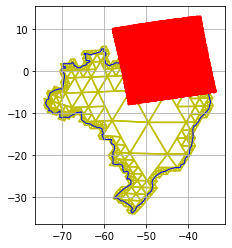

In [13]:
fig, ax = plt.subplots()
ax.grid(True)

brazil = world[world.name=='Brazil']
brazil.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=0)
brazil.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)
modis.plot(ax=ax, color='red', trixels=True)

In [15]:
a = modis.stare_intersects(brazil['stare'].iloc[0])
a.any()

True

In [17]:
len(brazil['stare'].iloc[0])

565